# Importing libraries

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from keras.utils.vis_utils import plot_model


In [8]:
all_data = pd.read_csv('E:/Documents/Smartnet/Subjects/Internship/Database/Software Adquisicion V3_Hopital_Broca/Patients Records_A_All_Broca/PO CA_14_01_1944/Test1.txt', skiprows = 21,sep=' ', header = None)

all_data.columns = ('Time', 'X', 'Y', 'P', 'Az', 'Al')

#Getting Pen In time  and x & y velocity 
pen_in = []
pen_up = []
all_data['Pen IN'] = np.where(all_data['P']>0, all_data['Time'], 0)
all_data['Pen UP'] = np.where(all_data['P']==0, all_data['Time'], 0)

#print(data.head(33))
all_data['x_vel'] = all_data['Time']
all_data['y_vel'] = all_data['Time']

all_data['Difference_IN'] = all_data['Pen IN']
all_data['Difference_UP'] = all_data['Pen UP']
all_data['x_vel UP'] = all_data['Pen UP']
all_data['x_vel IN'] = all_data['Pen IN']
all_data['y_vel UP'] = all_data['Pen UP']
all_data['y_vel IN'] = all_data['Pen IN']
i = 0

size = all_data['Time'].size
print(size)
for i in range(size - 1):
    if all_data['Pen IN'].iloc[i] > 0:
        if all_data['Pen IN'].iloc[i+1] == 0:
            all_data['Difference_IN'].iloc[i] = all_data['Pen IN'].iloc[i] - all_data['Pen IN'].iloc[i-1]
        if all_data['Pen IN'].iloc[i+1]>0:
            all_data['Difference_IN'].iloc[i] = all_data['Pen IN'].iloc[i+1] - all_data['Pen IN'].iloc[i]
#     if all_data['Difference_IN'].iloc[i] > 0:
#         all_data['Difference_IN'].iloc[i] = 8

    if all_data['Pen UP'].iloc[i] > 0:
        if all_data['Pen UP'].iloc[i+1]==0:
            all_data['Difference_UP'].iloc[i] = all_data['Pen UP'].iloc[i] - all_data['Pen UP'].iloc[i-1]
        if all_data['Pen UP'].iloc[i+1]>0:
            all_data['Difference_UP'].iloc[i] = all_data['Pen UP'].iloc[i+1] - all_data['Pen UP'].iloc[i]
#     if all_data['Difference_UP'].iloc[i] > 0:
#         all_data['Difference_UP'].iloc[i] = 8

# Getting X and Y velocity
    dis_x = all_data['X'].iloc[i+1] - all_data['X'].iloc[i]
    time_dif = all_data['Time'].iloc[i+1] - all_data['Time'].iloc[i]
    dis_y = all_data['Y'].iloc[i+1] - all_data['Y'].iloc[i]
    
    all_data['x_vel'].iloc[i] = abs(dis_x/time_dif)
    all_data['y_vel'].iloc[i] = abs(dis_y/time_dif)
# Getting X and Y velocity for Pen IN and pen Down
    
    if all_data['Pen UP'].iloc[i] > 0:
        all_data['x_vel UP'].iloc[i] = all_data['x_vel'].iloc[i]
    if all_data['Pen IN'].iloc[i] > 0:
        all_data['x_vel IN'].iloc[i] = all_data['x_vel'].iloc[i]
        
    if all_data['Pen UP'].iloc[i] > 0:
        all_data['y_vel UP'].iloc[i] = all_data['y_vel'].iloc[i]
    if all_data['Pen UP'].iloc[i] == 0:
        all_data['y_vel IN'].iloc[i] = all_data['y_vel'].iloc[i]
#     if all_data
    
all_data['x_vel'].iloc[-1] = 0
all_data['y_vel'].iloc[-1] = 0
all_data['y_vel UP'].iloc[-1] = 0
all_data['y_vel IN'].iloc[-1] = 0
all_data['x_vel IN'].iloc[-1] = 0
all_data['x_vel UP'].iloc[-1] = 0

all_data['Difference_IN'].iloc[size - 1] = all_data['Difference_IN'].iloc[size - 2]            
d_in = all_data['Difference_IN'].sum()
    
all_data['Difference_UP'].iloc[size - 1] = all_data['Difference_UP'].iloc[size - 2]
d_up = all_data['Difference_UP'].sum()

# print(all_data['x_vel'], all_data['y_vel'])
print(d_in, d_up, all_data['Time'].iloc[-1])

20248


E:\Programms\Anaconda\envs\tf\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


91506 62935 158647


# Visualization 

<Figure size 1296x648 with 0 Axes>

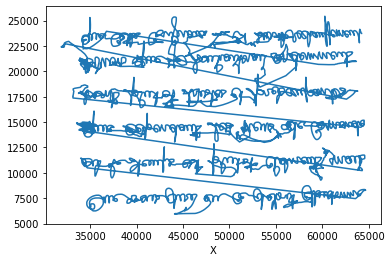

In [63]:
#Getting data
data_vis1 = pd.read_csv('E:/Documents/Smartnet/Subjects/Internship/Database/Software Adquisicion V3_Hopital_Broca/Patients Records_A_All_Broca/PO CA_14_01_1944/Test2.txt', skiprows = 21,sep=' ', header = None)

data_vis1.columns = ('Time', 'X', 'Y', 'P', 'Az', 'Al')
data_vis = data_vis1[['X','Y']]
# data_vis = data_vis.transpose()

plt.figure(figsize=(18,9))
# data_vis.plot.scatter(x = 'X', y = 'Y',s = 0.05);
data_vis.plot(x = 'X', y = 'Y');
plt.legend().remove()
plt.show()

# Data reading and feature extraction for given text task

In [13]:

a ='E:/Documents/Smartnet/Subjects/Internship/Database/Software Adquisicion V3_Hopital_Broca/Patients Records_A_All_Broca/'
b ='/Test1.txt'
data_list_v3 = pd.read_csv('E:/Documents/Smartnet/Subjects/Internship/Database/Software Adquisicion V3_Hopital_Broca/Patients Records_A_All_Broca/PatientList_Diagnostic_A_HC_MCI_AD_test3.txt', header = None)

overall_time_all_v3 = pd.DataFrame()
o_v3 = pd.DataFrame()
pen_in_time_v3 = []
pen_up_time_v3 = []

x_vel_v3 = []
y_vel_v3 = []

x_vel_IN_v3 = []
x_vel_UP_v3 = []
y_vel_IN_v3 = []
y_vel_UP_v3 = []



#Reading the datasets
for i in range(107):
    x_v3 = data_list_v3.loc[i][0]
    x_v3 = x_v3[:16]
    #print('Element is: ', x)
    y_v3 = a + x_v3 + b
    all_data_v3 = pd.read_csv(y_v3, skiprows = 22,sep=' ', header = None)
    all_data_v3.columns = ('Time', 'X', 'Y', 'P', 'Az', 'Al')    
    
    #Getting overall time
    data_v3 = all_data_v3.drop(columns = ['X','Y','Az','Al'])
    overall_time_v3 = pd.DataFrame(data_v3)
    overall_time_v3 = overall_time_v3.drop(columns = ['P'])
    overall_time_v3['Time'].iloc[0] = overall_time_v3['Time'].iloc[-1]
    overall_time_v3 = overall_time_v3.drop(overall_time_v3.index[1:])
    o_v3 = overall_time_v3.rename(columns = {'Time':i})
    overall_time_all_v3 = pd.concat([overall_time_all_v3, o_v3], axis=1, sort=False)
   

    #Getting Pen In time  and x & y velocity 
    pen_in = []
    pen_up = []
    all_data_v3['Pen IN'] = np.where(all_data_v3['P']>0, all_data_v3['Time'], 0)
    all_data_v3['Pen UP'] = np.where(all_data_v3['P']==0, all_data_v3['Time'], 0)
    i = 0
    k = 0
    d_in = 0
    d_up = 0
    all_data_v3['Difference_IN'] = all_data_v3['Pen IN']
    all_data_v3['Difference_UP'] = all_data_v3['Pen UP']
    size = all_data_v3['Pen IN'].size
    
    x_vel = 0
    y_vel = 0
    all_data_v3['x_vel'] = all_data_v3['Time']
    all_data_v3['y_vel'] = all_data_v3['Time']
    
    all_data_v3['x_vel UP'] = all_data_v3['Pen UP']
    all_data_v3['x_vel IN'] = all_data_v3['Pen IN']
    all_data_v3['y_vel UP'] = all_data_v3['Pen UP']
    all_data_v3['y_vel IN'] = all_data_v3['Pen IN']
    
    for k in range(size - 1):          
        if all_data_v3['Pen IN'].iloc[k] > 0:
            if all_data_v3['Pen IN'].iloc[k+1] == 0:
                all_data_v3['Difference_IN'].iloc[k] = all_data_v3['Pen IN'].iloc[k] - all_data_v3['Pen IN'].iloc[k-1]
            if all_data_v3['Pen IN'].iloc[k+1]>0:
                all_data_v3['Difference_IN'].iloc[k] = all_data_v3['Pen IN'].iloc[k+1] - all_data_v3['Pen IN'].iloc[k]
        if all_data_v3['Difference_IN'].iloc[k] > 0:
            all_data_v3['Difference_IN'].iloc[k] = 8

        if all_data_v3['Pen UP'].iloc[k] > 0:
            if all_data_v3['Pen UP'].iloc[k+1]==0:
                all_data_v3['Difference_UP'].iloc[k] = all_data_v3['Pen UP'].iloc[k] - all_data_v3['Pen UP'].iloc[k-1]
            if all_data_v3['Pen UP'].iloc[k+1]>0:
                all_data_v3['Difference_UP'].iloc[k] = all_data_v3['Pen UP'].iloc[k+1] - all_data_v3['Pen UP'].iloc[k]
        if all_data_v3['Difference_UP'].iloc[k] > 0:
            all_data_v3['Difference_UP'].iloc[k] = 8
    
        all_data_v3['x_vel'].iloc[k] = abs((all_data_v3['X'].iloc[k+1] - all_data_v3['X'].iloc[k])/(all_data_v3['Time'].iloc[k+1] - all_data_v3['Time'].iloc[k]))
        all_data_v3['y_vel'].iloc[k] = abs((all_data_v3['Y'].iloc[k+1] - all_data_v3['Y'].iloc[k])/(all_data_v3['Time'].iloc[k+1] - all_data_v3['Time'].iloc[k]))

        # Getting X and Y velocity for Pen IN and pen Down
    
        if all_data_v3['Pen UP'].iloc[k] > 0:
            all_data_v3['x_vel UP'].iloc[k] = all_data_v3['x_vel'].iloc[k]
        if all_data_v3['Pen UP'].iloc[k] == 0:
            all_data_v3['x_vel IN'].iloc[k] = all_data_v3['x_vel'].iloc[k]
        
        if all_data_v3['Pen UP'].iloc[k] > 0:
            all_data_v3['y_vel UP'].iloc[k] = all_data_v3['y_vel'].iloc[k]
        if all_data_v3['Pen UP'].iloc[k] == 0:
            all_data_v3['y_vel IN'].iloc[k] = all_data_v3['y_vel'].iloc[k]
    
    all_data_v3['Difference_IN'].iloc[size - 1] = all_data_v3['Difference_IN'].iloc[size - 2]            
    d_in = all_data_v3['Difference_IN'].sum()
    pen_in_time_v3.append(d_in)
    
    all_data_v3['Difference_UP'].iloc[size - 1] = all_data_v3['Difference_UP'].iloc[size - 2]
    d_up = all_data_v3['Difference_UP'].sum()
    pen_up_time_v3.append(d_up)
    
    all_data_v3['x_vel'].iloc[-1] = 0
    all_data_v3['y_vel'].iloc[-1] = 0
    
    x_vel = all_data_v3['x_vel'].mean()
    y_vel = all_data_v3['y_vel'].mean()
    
    x_vel_v3.append(x_vel)
    y_vel_v3.append(y_vel)
    
    all_data_v3['y_vel UP'].iloc[-1] = 0
    all_data_v3['y_vel IN'].iloc[-1] = 0
    all_data_v3['x_vel IN'].iloc[-1] = 0
    all_data_v3['x_vel UP'].iloc[-1] = 0
    
    x_vel_IN = all_data_v3['x_vel IN'].mean()
    x_vel_UP = all_data_v3['x_vel UP'].mean()
    y_vel_IN = all_data_v3['y_vel IN'].mean()
    y_vel_UP = all_data_v3['y_vel UP'].mean()
    
    x_vel_IN_v3.append(x_vel_IN)
    x_vel_UP_v3.append(x_vel_UP)
    y_vel_IN_v3.append(y_vel_IN)
    y_vel_UP_v3.append(y_vel_UP)

    
# Trasparenting the dataset
overall_time_all_v3 = overall_time_all_v3.T
overall_time_all_v3 = overall_time_all_v3.rename(columns = {0:'Overall time'}, index = {'Overall time':0})

overall_time_all_v3['Pen In time'] = pen_in_time_v3
overall_time_all_v3['Pen Up time'] = pen_up_time_v3

overall_time_all_v3['X vel'] = x_vel_v3
overall_time_all_v3['Y vel'] = y_vel_v3

overall_time_all_v3['Y vel IN'] = y_vel_IN_v3
overall_time_all_v3['Y vel UP'] = y_vel_UP_v3
overall_time_all_v3['X vel IN'] = x_vel_IN_v3
overall_time_all_v3['X vel UP'] = x_vel_UP_v3


print(overall_time_all_v3)

E:\Programms\Anaconda\envs\tf\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
E:\Programms\Anaconda\envs\tf\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
E:\Programms\Anaconda\envs\tf\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

     Overall time  Pen In time  Pen Up time     X vel     Y vel  Y vel IN  \
0          188037       110408        79512  4.362876  3.462216  1.726996   
1          178768        96776        72544  3.928517  3.307688  1.567314   
2          152599        95304        60432  2.926861  3.104962  2.097708   
3          158647        97400        64576  4.695611  4.375516  2.789102   
4          101138        55536        47400  7.212052  4.789479  2.643816   
..            ...          ...          ...       ...       ...       ...   
102        111827        66152        48880  7.256985  5.961761  3.448582   
103        120757        70488        50744  4.081999  4.112211  2.263931   
104         93479        58184        39008  5.193250  3.778273  2.176206   
105        134647        86096        53352  4.992681  2.908312  1.569160   
106        161008        76648        69352  5.074770  5.693222  2.774603   

     Y vel UP  X vel IN  X vel UP  
0    1.735220  1.415167  2.947709  
1  

In [15]:
c ='E:/Documents/Smartnet/Subjects/Internship/Database/Software acquisition V4_Hopital_Broca/Patients Records - Copie/HW-FRENCH/'
d ='/1/Test1.txt'
data_list_v4 = pd.read_csv('E:/Documents/Smartnet/Subjects/Internship/Database/Software acquisition V4_Hopital_Broca/Patients Records - Copie/PatientList_Diagnostic_B_HC_MCI_AD.txt', header = None)
i = 0
k = 0
overall_time_all_v4 = pd.DataFrame()
o_v4 = pd.DataFrame()

pen_in_time_v4 = []
pen_up_time_v4 = []

x_vel_v4 = []
y_vel_v4 = []

x_vel_IN_v4 = []
x_vel_UP_v4 = []
y_vel_IN_v4 = []
y_vel_UP_v4 = []

#Reading the datasets
for i in range(34):
    x_v4 = data_list_v4.loc[i][0]
    x_v4 = x_v4[:16]
    #print('Element is: ', x)
    y = c + x_v4 + d
    all_data_v4 = pd.read_csv(y, skiprows = 22,sep=' ', header = None)
    all_data_v4.columns = ('Time', 'X','Y', 'P', 'Az', 'Al')
    
    
    #Getting overall time
    data_v4 = all_data_v4.drop(columns = ['X','Y','Az','Al'])
    overall_time_v4 = pd.DataFrame(data_v4)
    overall_time_v4 = overall_time_v4.drop(columns = ['P'])
    overall_time_v4['Time'].iloc[0] = overall_time_v4['Time'].iloc[-1]
    overall_time_v4 = overall_time_v4.drop(overall_time_v4.index[1:])
    o_v4 = overall_time_v4.rename(columns = {'Time':i})
    overall_time_all_v4 = pd.concat([overall_time_all_v4, o_v4], axis=1, sort=False)
   

    #Getting Pen In time
    pen_in = []
    pen_up = []
    all_data_v4['Pen IN'] = np.where(all_data_v4['P']>0, all_data_v4['Time'], 0)
    all_data_v4['Pen UP'] = np.where(all_data_v4['P']==0, all_data_v4['Time'], 0)
    i = 0
    k = 0
    d_in = 0
    d_up = 0
    all_data_v4['Difference_IN'] = all_data_v4['Pen IN']
    all_data_v4['Difference_UP'] = all_data_v4['Pen UP']
    size = all_data_v4['Pen IN'].size

    x_vel = 0
    y_vel = 0
    all_data_v4['x_vel'] = all_data_v4['Time']
    all_data_v4['y_vel'] = all_data_v4['Time']
    
    all_data_v4['x_vel UP'] = all_data_v4['Pen UP']
    all_data_v4['x_vel IN'] = all_data_v4['Pen IN']
    all_data_v4['y_vel UP'] = all_data_v4['Pen UP']
    all_data_v4['y_vel IN'] = all_data_v4['Pen IN']
    
    for k in range(size - 1):          
        if all_data_v4['Pen IN'].iloc[k] > 0:
            if all_data_v4['Pen IN'].iloc[k+1] == 0:
                all_data_v4['Difference_IN'].iloc[k] = all_data_v4['Pen IN'].iloc[k] - all_data_v4['Pen IN'].iloc[k-1]
            if all_data_v4['Pen IN'].iloc[k+1] > 0:
                all_data_v4['Difference_IN'].iloc[k] = all_data_v4['Pen IN'].iloc[k+1] - all_data_v4['Pen IN'].iloc[k]
        if all_data_v4['Difference_IN'].iloc[k] > 0:
            all_data_v4['Difference_IN'].iloc[k] = 8

        if all_data_v4['Pen UP'].iloc[k] > 0:
            if all_data_v4['Pen UP'].iloc[k+1] == 0:
                all_data_v4['Difference_UP'].iloc[k] = all_data_v4['Pen UP'].iloc[k] - all_data_v4['Pen UP'].iloc[k-1]
            if all_data_v4['Pen UP'].iloc[k+1] > 0:
                all_data_v4['Difference_UP'].iloc[k] = all_data_v4['Pen UP'].iloc[k+1] - all_data_v4['Pen UP'].iloc[k]
        if all_data_v4['Difference_UP'].iloc[k] > 0:
            all_data_v4['Difference_UP'].iloc[k] = 8
    
        all_data_v4['x_vel'].iloc[k] = abs((all_data_v4['X'].iloc[k+1] - all_data_v4['X'].iloc[k])/(all_data_v4['Time'].iloc[k+1] - all_data_v4['Time'].iloc[k]))
        all_data_v4['y_vel'].iloc[k] = abs((all_data_v4['Y'].iloc[k+1] - all_data_v4['Y'].iloc[k])/(all_data_v4['Time'].iloc[k+1] - all_data_v4['Time'].iloc[k]))
        
# Getting X and Y velocity for Pen IN and pen Down
    
        if all_data_v4['Pen UP'].iloc[k] > 0:
            all_data_v4['x_vel UP'].iloc[k] = all_data_v4['x_vel'].iloc[k]
        if all_data_v4['Pen UP'].iloc[k] == 0:
            all_data_v4['x_vel IN'].iloc[k] = all_data_v4['x_vel'].iloc[k]
        
        if all_data_v4['Pen UP'].iloc[k] > 0:
            all_data_v4['y_vel UP'].iloc[k] = all_data_v4['y_vel'].iloc[k]
        if all_data_v4['Pen UP'].iloc[k] == 0:
            all_data_v4['y_vel IN'].iloc[k] = all_data_v4['y_vel'].iloc[k]
    
    all_data_v4['Difference_UP'].iloc[size - 1] = all_data_v4['Difference_UP'].iloc[size - 2]
    d_up = all_data_v4['Difference_UP'].sum()
    pen_up_time_v4.append(d_up)

    all_data_v4['Difference_IN'].iloc[size - 1] = all_data_v4['Difference_IN'].iloc[size - 2]            
    d_in = all_data_v4['Difference_IN'].sum()
    pen_in_time_v4.append(d_in)
    
    all_data_v4['x_vel'].iloc[-1] = 0
    all_data_v4['y_vel'].iloc[-1] = 0
    
    x_vel = all_data_v4['x_vel'].mean()
    y_vel = all_data_v4['y_vel'].mean()
    
    x_vel_v4.append(x_vel)
    y_vel_v4.append(y_vel)
    
    all_data_v4['y_vel UP'].iloc[-1] = 0
    all_data_v4['y_vel IN'].iloc[-1] = 0
    all_data_v4['x_vel IN'].iloc[-1] = 0
    all_data_v4['x_vel UP'].iloc[-1] = 0
    
    x_vel_IN = all_data_v4['x_vel IN'].mean()
    x_vel_UP = all_data_v4['x_vel UP'].mean()
    y_vel_IN = all_data_v4['y_vel IN'].mean()
    y_vel_UP = all_data_v4['y_vel UP'].mean()
    
    x_vel_IN_v4.append(x_vel_IN)
    x_vel_UP_v4.append(x_vel_UP)
    y_vel_IN_v4.append(y_vel_IN)
    y_vel_UP_v4.append(y_vel_UP)
    
#Trasparenting the dataset
overall_time_all_v4 = overall_time_all_v4.T
overall_time_all_v4 = overall_time_all_v4.rename(columns = {0:'Overall time'}, index = {'Overall time':0})

overall_time_all_v4['Pen In time'] = pen_in_time_v4
overall_time_all_v4['Pen Up time'] = pen_up_time_v4

overall_time_all_v4['X vel'] = x_vel_v4
overall_time_all_v4['Y vel'] = y_vel_v4

overall_time_all_v4['Y vel IN'] = y_vel_IN_v4
overall_time_all_v4['Y vel UP'] = y_vel_UP_v4
overall_time_all_v4['X vel IN'] = x_vel_IN_v4
overall_time_all_v4['X vel UP'] = x_vel_UP_v4

print(overall_time_all_v4)

E:\Programms\Anaconda\envs\tf\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
E:\Programms\Anaconda\envs\tf\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
E:\Programms\Anaconda\envs\tf\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

    Overall time  Pen In time  Pen Up time     X vel     Y vel  Y vel IN  \
0          67406        46056        24064  6.424979  3.981427  2.501289   
1         138116        64048        71064  2.738659  2.767855  1.229961   
2          98325        63368        39936  6.079703  3.875369  2.201649   
3         146251        80280        68456  5.110866  4.273562  2.309211   
4         102381        50920        50904  4.386533  3.450220  1.832285   
5         107669        77616        33736  6.332024  5.360737  3.494542   
6         131582        83808        50736  4.822062  4.904351  3.149455   
7         116376        54424        65968  4.794314  4.206479  1.925412   
8         109219        69336        41048  4.431787  3.969908  2.476520   
9          95475        46432        50664  4.703216  2.981536  1.323841   
10        106433        61560        44312  7.551506  4.526703  2.720116   
11        119040        68328        54816  5.946947  7.499554  4.811733   
12        16

# Data reading and feature extraction for free text task

In [16]:
#V3 database

f ='/Test2.txt'

overall_time_all_free_v3 = pd.DataFrame()
o_v3 = pd.DataFrame()

pen_in_time_free_v3 = []
pen_up_time_free_v3 = []

x_vel_free_v3 = []
y_vel_free_v3 = []

x_vel_IN_free_v3 = []
x_vel_UP_free_v3 = []
y_vel_IN_free_v3 = []
y_vel_UP_free_v3 = []
i = 0
#Reading the datasets
for i in range(107):
    x_v3 = data_list_v3.loc[i][0]
    x_v3 = x_v3[:16]
    #print('Element is: ', x)
    y_v3 = a + x_v3 + f
    all_data_v3 = pd.read_csv(y_v3, skiprows = 22,sep=' ', header = None)
    all_data_v3.columns = ('Time', 'X', 'Y', 'P', 'Az', 'Al')    
    
    #Getting overall time
    data_v3 = all_data_v3.drop(columns = ['X','Y','Az','Al'])
    overall_time_free_v3 = pd.DataFrame(data_v3)
    overall_time_free_v3 = overall_time_free_v3.drop(columns = ['P'])
    overall_time_free_v3['Time'].iloc[0] = overall_time_free_v3['Time'].iloc[-1]
    overall_time_free_v3 = overall_time_free_v3.drop(overall_time_free_v3.index[1:])
    o_v3 = overall_time_free_v3.rename(columns = {'Time':i})
    overall_time_all_free_v3 = pd.concat([overall_time_all_free_v3, o_v3], axis=1, sort=False)
   
    #Getting Pen In time and x & y velocity
    pen_in = []
    pen_up = []
    all_data_v3['Pen IN'] = np.where(all_data_v3['P']>0, all_data_v3['Time'], 0)
    all_data_v3['Pen UP'] = np.where(all_data_v3['P']==0, all_data_v3['Time'], 0)
    k = 0
    d_in = 0
    d_up = 0
    all_data_v3['Difference_IN'] = all_data_v3['Pen IN']
    all_data_v3['Difference_UP'] = all_data_v3['Pen UP']
    size = all_data_v3['Pen IN'].size
    
    x_vel = 0
    y_vel = 0
    all_data_v3['x_vel'] = all_data_v3['Time']
    all_data_v3['y_vel'] = all_data_v3['Time']
    
    all_data_v3['x_vel UP'] = all_data_v3['Pen UP']
    all_data_v3['x_vel IN'] = all_data_v3['Pen IN']
    all_data_v3['y_vel UP'] = all_data_v3['Pen UP']
    all_data_v3['y_vel IN'] = all_data_v3['Pen IN']
    
    for k in range(size - 1):          
        if all_data_v3['Pen IN'].iloc[k] > 0:
            if all_data_v3['Pen IN'].iloc[k+1] == 0:
                all_data_v3['Difference_IN'].iloc[k] = all_data_v3['Pen IN'].iloc[k] - all_data_v3['Pen IN'].iloc[k-1]
            if all_data_v3['Pen IN'].iloc[k+1]>0:
                all_data_v3['Difference_IN'].iloc[k] = all_data_v3['Pen IN'].iloc[k+1] - all_data_v3['Pen IN'].iloc[k]
        if all_data_v3['Difference_IN'].iloc[k] > 0:
            all_data_v3['Difference_IN'].iloc[k] = 8

        if all_data_v3['Pen UP'].iloc[k] > 0:
            if all_data_v3['Pen UP'].iloc[k+1]==0:
                all_data_v3['Difference_UP'].iloc[k] = all_data_v3['Pen UP'].iloc[k] - all_data_v3['Pen UP'].iloc[k-1]
            if all_data_v3['Pen UP'].iloc[k+1]>0:
                all_data_v3['Difference_UP'].iloc[k] = all_data_v3['Pen UP'].iloc[k+1] - all_data_v3['Pen UP'].iloc[k]
        if all_data_v3['Difference_UP'].iloc[k] > 0:
            all_data_v3['Difference_UP'].iloc[k] = 8
          
        all_data_v3['x_vel'].iloc[k] = abs((all_data_v3['X'].iloc[k+1] - all_data_v3['X'].iloc[k])/(all_data_v3['Time'].iloc[k+1] - all_data_v3['Time'].iloc[k]))
        all_data_v3['y_vel'].iloc[k] = abs((all_data_v3['Y'].iloc[k+1] - all_data_v3['Y'].iloc[k])/(all_data_v3['Time'].iloc[k+1] - all_data_v3['Time'].iloc[k]))
        
#Getting X and Y velocity for Pen IN and Pen Down
        if all_data_v3['Pen UP'].iloc[k] > 0:
            all_data_v3['x_vel UP'].iloc[k] = all_data_v3['x_vel'].iloc[k]
        if all_data_v3['Pen UP'].iloc[k] == 0:
            all_data_v3['x_vel IN'].iloc[k] = all_data_v3['x_vel'].iloc[k]
        
        if all_data_v3['Pen UP'].iloc[k] > 0:
            all_data_v3['y_vel UP'].iloc[k] = all_data_v3['y_vel'].iloc[k]
        if all_data_v3['Pen UP'].iloc[k] == 0:
            all_data_v3['y_vel IN'].iloc[k] = all_data_v3['y_vel'].iloc[k]
        
        
        
    all_data_v3['Difference_UP'].iloc[size - 1] = all_data_v3['Difference_UP'].iloc[size - 2]
    d_up = all_data_v3['Difference_UP'].sum()
    pen_up_time_free_v3.append(d_up)
    
    all_data_v3['Difference_IN'].iloc[size - 1] = all_data_v3['Difference_IN'].iloc[size - 2]            
    d_in = all_data_v3['Difference_IN'].sum()
    pen_in_time_free_v3.append(d_in)
    
    all_data_v3['x_vel'].iloc[-1] = 0
    all_data_v3['y_vel'].iloc[-1] = 0
    
    x_vel = all_data_v3['x_vel'].mean()
    y_vel = all_data_v3['y_vel'].mean()
    
    x_vel_free_v3.append(x_vel)
    y_vel_free_v3.append(y_vel)
    
    all_data_v3['y_vel UP'].iloc[-1] = 0
    all_data_v3['y_vel IN'].iloc[-1] = 0
    all_data_v3['x_vel IN'].iloc[-1] = 0
    all_data_v3['x_vel UP'].iloc[-1] = 0
    
    x_vel_IN = all_data_v3['x_vel IN'].mean()
    x_vel_UP = all_data_v3['x_vel UP'].mean()
    y_vel_IN = all_data_v3['y_vel IN'].mean()
    y_vel_UP = all_data_v3['y_vel UP'].mean()
    
    x_vel_IN_free_v3.append(x_vel_IN)
    x_vel_UP_free_v3.append(x_vel_UP)
    y_vel_IN_free_v3.append(y_vel_IN)
    y_vel_UP_free_v3.append(y_vel_UP)
    
# Trasparenting the dataset
overall_time_all_free_v3 = overall_time_all_free_v3.T
overall_time_all_free_v3 = overall_time_all_free_v3.rename(columns = {0:'Overall time'}, index = {'Overall time':0})

overall_time_all_free_v3['Pen In time'] = pen_in_time_free_v3
overall_time_all_free_v3['Pen Up time'] = pen_up_time_free_v3

overall_time_all_free_v3['X vel'] = x_vel_free_v3
overall_time_all_free_v3['Y vel'] = y_vel_free_v3

overall_time_all_free_v3['Y vel IN'] = y_vel_IN_free_v3
overall_time_all_free_v3['Y vel UP'] = y_vel_UP_free_v3
overall_time_all_free_v3['X vel IN'] = x_vel_IN_free_v3
overall_time_all_free_v3['X vel UP'] = x_vel_UP_free_v3

print(overall_time_all_free_v3)

E:\Programms\Anaconda\envs\tf\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
E:\Programms\Anaconda\envs\tf\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
E:\Programms\Anaconda\envs\tf\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

     Overall time  Pen In time  Pen Up time     X vel     Y vel  Y vel IN  \
0           10262        65712        35792  3.885950  2.951786  1.872226   
1           69409        43168        28024  4.654495  3.448768  1.851243   
2          142082        65832        74312  4.027771  2.548223  1.402129   
3              16        86720        83576  3.816090  4.101413  2.748460   
4           65864        34632        32616  9.127564  5.352601  2.989289   
..            ...          ...          ...       ...       ...       ...   
102         68731        45992        25264  8.413366  6.102757  3.927786   
103        108192        58528        46312  6.124704  4.913454  2.815685   
104         61410        37304        26080  6.219488  4.490132  2.497268   
105        103509        69392        38344  5.757566  2.808882  1.829478   
106         68680        27088        33464  5.833782  9.254138  2.780821   

     Y vel UP  X vel IN  X vel UP  
0    1.079475  1.836999  2.048790  
1  

In [17]:
overall_time_all_free_v3['Pen In time'] = pen_in_time_free_v3
overall_time_all_free_v3['Pen Up time'] = pen_up_time_free_v3

print(overall_time_all_free_v3)

     Overall time  Pen In time  Pen Up time     X vel     Y vel  Y vel IN  \
0           10262        65712        35792  3.885950  2.951786  1.872226   
1           69409        43168        28024  4.654495  3.448768  1.851243   
2          142082        65832        74312  4.027771  2.548223  1.402129   
3              16        86720        83576  3.816090  4.101413  2.748460   
4           65864        34632        32616  9.127564  5.352601  2.989289   
..            ...          ...          ...       ...       ...       ...   
102         68731        45992        25264  8.413366  6.102757  3.927786   
103        108192        58528        46312  6.124704  4.913454  2.815685   
104         61410        37304        26080  6.219488  4.490132  2.497268   
105        103509        69392        38344  5.757566  2.808882  1.829478   
106         68680        27088        33464  5.833782  9.254138  2.780821   

     Y vel UP  X vel IN  X vel UP  
0    1.079475  1.836999  2.048790  
1  

In [18]:
#V4 database

e ='/1/Test2.txt'

overall_time_all_free_v4 = pd.DataFrame()
o_v4 = pd.DataFrame()

pen_in_time_free_v4 = []
pen_up_time_free_v4 = []

x_vel_free_v4 = []
y_vel_free_v4 = []
x_vel_IN_free_v4 = []
x_vel_UP_free_v4 = []
y_vel_IN_free_v4 = []
y_vel_UP_free_v4 = []
i = 0
#Reading the datasets
for i in range(34):
    x_v4 = data_list_v4.loc[i][0]
    x_v4 = x_v4[:16]
    #print('Element is: ', x)
    y_v3 = c + x_v4 + e
    all_data_v4 = pd.read_csv(y_v3, skiprows = 22,sep=' ', header = None)
    all_data_v4.columns = ('Time', 'X', 'Y', 'P', 'Az', 'Al')    
    
    #Getting overall time
    data_v4 = all_data_v4.drop(columns = ['X','Y','Az','Al'])
    overall_time_free_v4 = pd.DataFrame(data_v4)
    overall_time_free_v4 = overall_time_free_v4.drop(columns = ['P'])
    overall_time_free_v4['Time'].iloc[0] = overall_time_free_v4['Time'].iloc[-1]
    overall_time_free_v4 = overall_time_free_v4.drop(overall_time_free_v4.index[1:])
    o_v4 = overall_time_free_v4.rename(columns = {'Time':i})
    overall_time_all_free_v4 = pd.concat([overall_time_all_free_v4, o_v4], axis=1, sort=False)
   

    #Getting Pen In time
    pen_in = []
    pen_up = []
    all_data_v4['Pen IN'] = np.where(all_data_v4['P']>0, all_data_v4['Time'], 0)
    all_data_v4['Pen UP'] = np.where(all_data_v4['P']==0, all_data_v4['Time'], 0)
    k = 0
    d_in = 0
    d_up = 0
    all_data_v4['Difference_IN'] = all_data_v4['Pen IN']
    all_data_v4['Difference_UP'] = all_data_v4['Pen UP']
    size = all_data_v4['Pen IN'].size

    x_vel = 0
    y_vel = 0
    all_data_v4['x_vel'] = all_data_v4['Time']
    all_data_v4['y_vel'] = all_data_v4['Time']
    
    all_data_v4['x_vel UP'] = all_data_v4['Pen UP']
    all_data_v4['x_vel IN'] = all_data_v4['Pen IN']
    all_data_v4['y_vel UP'] = all_data_v4['Pen UP']
    all_data_v4['y_vel IN'] = all_data_v4['Pen IN']
    
    for k in range(size - 1):          
        if all_data_v4['Pen IN'].iloc[k] > 0:
            if all_data_v4['Pen IN'].iloc[k+1] == 0:
                all_data_v4['Difference_IN'].iloc[k] = all_data_v4['Pen IN'].iloc[k] - all_data_v4['Pen IN'].iloc[k-1]
            if all_data_v4['Pen IN'].iloc[k+1]>0:
                all_data_v4['Difference_IN'].iloc[k] = all_data_v4['Pen IN'].iloc[k+1] - all_data_v4['Pen IN'].iloc[k]
        if all_data_v4['Difference_IN'].iloc[k] > 0:
            all_data_v4['Difference_IN'].iloc[k] = 8

        if all_data_v4['Pen UP'].iloc[k] > 0:
            if all_data_v4['Pen UP'].iloc[k+1]==0:
                all_data_v4['Difference_UP'].iloc[k] = all_data_v4['Pen UP'].iloc[k] - all_data_v4['Pen UP'].iloc[k-1]
            if all_data_v4['Pen UP'].iloc[k+1]>0:
                all_data_v4['Difference_UP'].iloc[k] = all_data_v4['Pen UP'].iloc[k+1] - all_data_v4['Pen UP'].iloc[k]
        if all_data_v4['Difference_UP'].iloc[k] > 0:
            all_data_v4['Difference_UP'].iloc[k] = 8
    
        all_data_v4['x_vel'].iloc[k] = abs((all_data_v4['X'].iloc[k+1] - all_data_v4['X'].iloc[k])/(all_data_v4['Time'].iloc[k+1] - all_data_v4['Time'].iloc[k]))
        all_data_v4['y_vel'].iloc[k] = abs((all_data_v4['Y'].iloc[k+1] - all_data_v4['Y'].iloc[k])/(all_data_v4['Time'].iloc[k+1] - all_data_v4['Time'].iloc[k]))
# Getting X and Y velocity for Pen In and Pen Down

        if all_data_v4['Pen UP'].iloc[k] > 0:
            all_data_v4['x_vel UP'].iloc[k] = all_data_v4['x_vel'].iloc[k]
        if all_data_v4['Pen UP'].iloc[k] == 0:
            all_data_v4['x_vel IN'].iloc[k] = all_data_v4['x_vel'].iloc[k]
        
        if all_data_v4['Pen UP'].iloc[k] > 0:
            all_data_v4['y_vel UP'].iloc[k] = all_data_v4['y_vel'].iloc[k]
        if all_data_v4['Pen UP'].iloc[k] == 0:
            all_data_v4['y_vel IN'].iloc[k] = all_data_v4['y_vel'].iloc[k]
            
            
    all_data_v4['Difference_UP'].iloc[size - 1] = all_data_v4['Difference_UP'].iloc[size - 2]
    d_up = all_data_v4['Difference_UP'].sum()
    pen_up_time_free_v4.append(d_up)
    
    all_data_v4['Difference_IN'].iloc[size - 1] = all_data_v4['Difference_IN'].iloc[size - 2]            
    d_in = all_data_v4['Difference_IN'].sum()
    pen_in_time_free_v4.append(d_in)
    
    all_data_v4['x_vel'].iloc[-1] = 0
    all_data_v4['y_vel'].iloc[-1] = 0
    
    x_vel = all_data_v4['x_vel'].mean()
    y_vel = all_data_v4['y_vel'].mean()
    
    x_vel_free_v4.append(x_vel)
    y_vel_free_v4.append(y_vel)
    
    all_data_v4['y_vel UP'].iloc[-1] = 0
    all_data_v4['y_vel IN'].iloc[-1] = 0
    all_data_v4['x_vel IN'].iloc[-1] = 0
    all_data_v4['x_vel UP'].iloc[-1] = 0
    
    x_vel_IN = all_data_v4['x_vel IN'].mean()
    x_vel_UP = all_data_v4['x_vel UP'].mean()
    y_vel_IN = all_data_v4['y_vel IN'].mean()
    y_vel_UP = all_data_v4['y_vel UP'].mean()
    
    x_vel_IN_free_v4.append(x_vel_IN)
    x_vel_UP_free_v4.append(x_vel_UP)
    y_vel_IN_free_v4.append(y_vel_IN)
    y_vel_UP_free_v4.append(y_vel_UP)
    
# Trasparenting the dataset
overall_time_all_free_v4 = overall_time_all_free_v4.T
overall_time_all_free_v4 = overall_time_all_free_v4.rename(columns = {0:'Overall time'}, index = {'Overall time':0})

overall_time_all_free_v4['Pen In time'] = pen_in_time_free_v4
overall_time_all_free_v4['Pen Up time'] = pen_up_time_free_v4

overall_time_all_free_v4['X vel'] = x_vel_free_v4
overall_time_all_free_v4['Y vel'] = y_vel_free_v4

overall_time_all_free_v4['Y vel IN'] = y_vel_IN_v4
overall_time_all_free_v4['Y vel UP'] = y_vel_UP_v4
overall_time_all_free_v4['X vel IN'] = x_vel_IN_v4
overall_time_all_free_v4['X vel UP'] = x_vel_UP_v4

print(overall_time_all_free_v4)

E:\Programms\Anaconda\envs\tf\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
E:\Programms\Anaconda\envs\tf\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
E:\Programms\Anaconda\envs\tf\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

    Overall time  Pen In time  Pen Up time     X vel     Y vel  Y vel IN  \
0          64564        44880        22472  7.184865  4.409899  2.501289   
1         187744        89416        85736  2.531795  2.754052  1.229961   
2          90442        52448        40768  5.228432  3.387312  2.201649   
3          90617        47856        43632  6.863114  4.456922  2.309211   
4          86896        40728        40088  4.564485  3.577321  1.832285   
5          85915        65888        25560  6.382285  5.285416  3.494542   
6         124162        76248        52120  5.432826  4.821628  3.149455   
7         111974        61752        52088  5.614728  3.702434  1.925412   
8          71496        42688        32968  4.315079  3.609797  2.476520   
9          51744        26040        24696  4.619932  3.160962  1.323841   
10         61082        37456        25696  6.735061  4.816355  2.720116   
11         96054        54616        44880  5.955466  7.881137  4.811733   
12        15

# Data reading and feature extraction for loops task 

In [20]:
#V3 database

f ='/Test3.txt'

overall_time_all_loops_v3 = pd.DataFrame()
o_v3 = pd.DataFrame()

pen_in_time_loops_v3 = []
pen_up_time_loops_v3 = []

x_vel_loops_v3 = []
y_vel_loops_v3 = []

x_vel_IN_loops_v3 = []
x_vel_UP_loops_v3 = []
y_vel_IN_loops_v3 = []
y_vel_UP_loops_v3 = []

i = 0
#Reading the datasets
for i in range(107):
    x_v3 = data_list_v3.loc[i][0]
    x_v3 = x_v3[:16]
    #print('Element is: ', x)
    y_v3 = a + x_v3 + f
    all_data_v3 = pd.read_csv(y_v3, skiprows = 22,sep=' ', header = None)
    all_data_v3.columns = ('Time', 'X', 'Y', 'P', 'Az', 'Al')    
    
    #Getting overall time
    data_v3 = all_data_v3.drop(columns = ['X','Y','Az','Al'])
    overall_time_loops_v3 = pd.DataFrame(data_v3)
    overall_time_loops_v3 = overall_time_loops_v3.drop(columns = ['P'])
    overall_time_loops_v3['Time'].iloc[0] = overall_time_loops_v3['Time'].iloc[-1]
    overall_time_loops_v3 = overall_time_loops_v3.drop(overall_time_loops_v3.index[1:])
    o_v3 = overall_time_loops_v3.rename(columns = {'Time':i})
    overall_time_all_loops_v3 = pd.concat([overall_time_all_loops_v3, o_v3], axis=1, sort=False)
   

    #Getting Pen In time
    pen_in = []
    pen_up = []
    all_data_v3['Pen IN'] = np.where(all_data_v3['P']>0, all_data_v3['Time'], 0)
    all_data_v3['Pen UP'] = np.where(all_data_v3['P']==0, all_data_v3['Time'], 0)
    k = 0
    d_in = 0
    d_up = 0
    all_data_v3['Difference_IN'] = all_data_v3['Pen IN']
    all_data_v3['Difference_UP'] = all_data_v3['Pen UP']
    size = all_data_v3['Pen IN'].size

    x_vel = 0
    y_vel = 0
    all_data_v3['x_vel'] = all_data_v3['Time']
    all_data_v3['y_vel'] = all_data_v3['Time']
    
    all_data_v3['x_vel UP'] = all_data_v3['Pen UP']
    all_data_v3['x_vel IN'] = all_data_v3['Pen IN']
    all_data_v3['y_vel UP'] = all_data_v3['Pen UP']
    all_data_v3['y_vel IN'] = all_data_v3['Pen IN']
    
    for k in range(size - 1):          
        if all_data_v3['Pen IN'].iloc[k] > 0:
            if all_data_v3['Pen IN'].iloc[k+1] == 0:
                all_data_v3['Difference_IN'].iloc[k] = all_data_v3['Pen IN'].iloc[k] - all_data_v3['Pen IN'].iloc[k-1]
            if all_data_v3['Pen IN'].iloc[k+1]>0:
                all_data_v3['Difference_IN'].iloc[k] = all_data_v3['Pen IN'].iloc[k+1] - all_data_v3['Pen IN'].iloc[k]
        if all_data_v3['Difference_IN'].iloc[k] > 0:
            all_data_v3['Difference_IN'].iloc[k] = 8

        if all_data_v3['Pen UP'].iloc[k] > 0:
            if all_data_v3['Pen UP'].iloc[k+1]==0:
                all_data_v3['Difference_UP'].iloc[k] = all_data_v3['Pen UP'].iloc[k] - all_data_v3['Pen UP'].iloc[k-1]
            if all_data_v3['Pen UP'].iloc[k+1]>0:
                all_data_v3['Difference_UP'].iloc[k] = all_data_v3['Pen UP'].iloc[k+1] - all_data_v3['Pen UP'].iloc[k]
        if all_data_v3['Difference_UP'].iloc[k] > 0:
            all_data_v3['Difference_UP'].iloc[k] = 8
                    
        all_data_v3['x_vel'].iloc[k] = abs((all_data_v3['X'].iloc[k+1] - all_data_v3['X'].iloc[k])/(all_data_v3['Time'].iloc[k+1] - all_data_v3['Time'].iloc[k]))
        all_data_v3['y_vel'].iloc[k] = abs((all_data_v3['Y'].iloc[k+1] - all_data_v3['Y'].iloc[k])/(all_data_v3['Time'].iloc[k+1] - all_data_v3['Time'].iloc[k]))

# Getting X and Y velocity for Pen IN and pen Down
    
        if all_data_v3['Pen UP'].iloc[k] > 0:
            all_data_v3['x_vel UP'].iloc[k] = all_data_v3['x_vel'].iloc[k]
        if all_data_v3['Pen UP'].iloc[k] == 0:
            all_data_v3['x_vel IN'].iloc[k] = all_data_v3['x_vel'].iloc[k]
        
        if all_data_v3['Pen UP'].iloc[k] > 0:
            all_data_v3['y_vel UP'].iloc[k] = all_data_v3['y_vel'].iloc[k]
        if all_data_v3['Pen UP'].iloc[k] == 0:
            all_data_v3['y_vel IN'].iloc[k] = all_data_v3['y_vel'].iloc[k]
        
    all_data_v3['Difference_UP'].iloc[size - 1] = all_data_v3['Difference_UP'].iloc[size - 2]
    d_up = all_data_v3['Difference_UP'].sum()
    pen_up_time_loops_v3.append(d_up)
    
    all_data_v3['Difference_IN'].iloc[size - 1] = all_data_v3['Difference_IN'].iloc[size - 2]            
    d_in = all_data_v3['Difference_IN'].sum()
    pen_in_time_loops_v3.append(d_in)
    
    all_data_v3['x_vel'].iloc[-1] = 0
    all_data_v3['y_vel'].iloc[-1] = 0
    
    x_vel = all_data_v3['x_vel'].mean()
    y_vel = all_data_v3['y_vel'].mean()
    
    x_vel_loops_v3.append(x_vel)
    y_vel_loops_v3.append(y_vel)
    
    all_data_v3['y_vel UP'].iloc[-1] = 0
    all_data_v3['y_vel IN'].iloc[-1] = 0
    all_data_v3['x_vel IN'].iloc[-1] = 0
    all_data_v3['x_vel UP'].iloc[-1] = 0
    
    x_vel_IN = all_data_v3['x_vel IN'].mean()
    x_vel_UP = all_data_v3['x_vel UP'].mean()
    y_vel_IN = all_data_v3['y_vel IN'].mean()
    y_vel_UP = all_data_v3['y_vel UP'].mean()
    
    x_vel_IN_loops_v3.append(x_vel_IN)
    x_vel_UP_loops_v3.append(x_vel_UP)
    y_vel_IN_loops_v3.append(y_vel_IN)
    y_vel_UP_loops_v3.append(y_vel_UP)    
    
# Trasparenting the dataset
overall_time_all_loops_v3 = overall_time_all_loops_v3.T
overall_time_all_loops_v3 = overall_time_all_loops_v3.rename(columns = {0:'Overall time'}, index = {'Overall time':0})

overall_time_all_loops_v3['Pen In time'] = pen_in_time_loops_v3
overall_time_all_loops_v3['Pen Up time'] = pen_up_time_loops_v3

overall_time_all_loops_v3['X vel'] = x_vel_loops_v3
overall_time_all_loops_v3['Y vel'] = y_vel_loops_v3

overall_time_all_loops_v3['Y vel IN'] = y_vel_IN_v3
overall_time_all_loops_v3['Y vel UP'] = y_vel_UP_v3
overall_time_all_loops_v3['X vel IN'] = x_vel_IN_v3
overall_time_all_loops_v3['X vel UP'] = x_vel_UP_v3

print(overall_time_all_loops_v3)

E:\Programms\Anaconda\envs\tf\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
E:\Programms\Anaconda\envs\tf\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
E:\Programms\Anaconda\envs\tf\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

     Overall time  Pen In time  Pen Up time     X vel     Y vel  Y vel IN  \
0           24613        13368        10544  3.066914  2.787560  1.726996   
1           13726         8272         5360  6.494149  7.284539  1.567314   
2           17969        11192         6872  5.142555  4.362187  2.097708   
3           13709        10528         2904  4.120301  7.573811  2.789102   
4           11542         8440         2824  4.965892  8.057739  2.643816   
..            ...          ...          ...       ...       ...       ...   
102         21092        18272         3616  4.053736  5.717770  3.448582   
103         17434        14232         3560  4.163526  5.215623  2.263931   
104          9435         7624         2256  6.561391  6.951103  2.176206   
105         14293        10504         2744  7.077393  4.674225  1.569160   
106         12591         8208         4456  6.761176  7.515756  2.774603   

     Y vel UP  X vel IN  X vel UP  
0    1.735220  1.415167  2.947709  
1  

In [21]:
#V4 database

h ='/1/Test3.txt'

overall_time_all_loops_v4 = pd.DataFrame()
o_v4 = pd.DataFrame()

pen_in_time_loops_v4 = []
pen_up_time_loops_v4 = []

x_vel_loops_v4 = []
y_vel_loops_v4 = []

x_vel_IN_loops_v4 = []
x_vel_UP_loops_v4 = []
y_vel_IN_loops_v4 = []
y_vel_UP_loops_v4 = []

i = 0
#Reading the datasets
for i in range(34):
    x_v4 = data_list_v4.loc[i][0]
    x_v4 = x_v4[:16]
    #print('Element is: ', x)
    y_v3 = c + x_v4 + e
    all_data_v4 = pd.read_csv(y_v3, skiprows = 22,sep=' ', header = None)
    all_data_v4.columns = ('Time', 'X', 'Y', 'P', 'Az', 'Al')    
    
    #Getting overall time
    data_v4 = all_data_v4.drop(columns = ['X','Y','Az','Al'])
    overall_time_loops_v4 = pd.DataFrame(data_v4)
    overall_time_loops_v4 = overall_time_loops_v4.drop(columns = ['P'])
    overall_time_loops_v4['Time'].iloc[0] = overall_time_loops_v4['Time'].iloc[-1]
    overall_time_loops_v4 = overall_time_loops_v4.drop(overall_time_loops_v4.index[1:])
    o_v4 = overall_time_loops_v4.rename(columns = {'Time':i})
    overall_time_all_loops_v4 = pd.concat([overall_time_all_loops_v4, o_v4], axis=1, sort=False)
   

    #Getting Pen In time
    pen_in = []
    pen_up = []
    all_data_v4['Pen IN'] = np.where(all_data_v4['P']>0, all_data_v4['Time'], 0)
    all_data_v4['Pen UP'] = np.where(all_data_v4['P']==0, all_data_v4['Time'], 0)
    k = 0
    d_in = 0
    d_up = 0
    all_data_v4['Difference_IN'] = all_data_v4['Pen IN']
    all_data_v4['Difference_UP'] = all_data_v4['Pen UP']
    size = all_data_v4['Pen IN'].size

    x_vel = 0
    y_vel = 0
    all_data_v4['x_vel'] = all_data_v4['Time']
    all_data_v4['y_vel'] = all_data_v4['Time']
    
    all_data_v4['x_vel UP'] = all_data_v4['Pen UP']
    all_data_v4['x_vel IN'] = all_data_v4['Pen IN']
    all_data_v4['y_vel UP'] = all_data_v4['Pen UP']
    all_data_v4['y_vel IN'] = all_data_v4['Pen IN']
    
    for k in range(size - 1):          
        if all_data_v4['Pen IN'].iloc[k] > 0:
            if all_data_v4['Pen IN'].iloc[k+1] == 0:
                all_data_v4['Difference_IN'].iloc[k] = all_data_v4['Pen IN'].iloc[k] - all_data_v4['Pen IN'].iloc[k-1]
            if all_data_v4['Pen IN'].iloc[k+1]>0:
                all_data_v4['Difference_IN'].iloc[k] = all_data_v4['Pen IN'].iloc[k+1] - all_data_v4['Pen IN'].iloc[k]
        if all_data_v4['Difference_IN'].iloc[k] > 0:
            all_data_v4['Difference_IN'].iloc[k] = 8

        if all_data_v4['Pen UP'].iloc[k] > 0:
            if all_data_v4['Pen UP'].iloc[k+1]==0:
                all_data_v4['Difference_UP'].iloc[k] = all_data_v4['Pen UP'].iloc[k] - all_data_v4['Pen UP'].iloc[k-1]
            if all_data_v4['Pen UP'].iloc[k+1]>0:
                all_data_v4['Difference_UP'].iloc[k] = all_data_v4['Pen UP'].iloc[k+1] - all_data_v4['Pen UP'].iloc[k]
        if all_data_v4['Difference_UP'].iloc[k] > 0:
            all_data_v4['Difference_UP'].iloc[k] = 8
            
        all_data_v4['x_vel'].iloc[k] = abs((all_data_v4['X'].iloc[k+1] - all_data_v4['X'].iloc[k])/(all_data_v4['Time'].iloc[k+1] - all_data_v4['Time'].iloc[k]))
        all_data_v4['y_vel'].iloc[k] = abs((all_data_v4['Y'].iloc[k+1] - all_data_v4['Y'].iloc[k])/(all_data_v4['Time'].iloc[k+1] - all_data_v4['Time'].iloc[k]))

        # Getting X and Y velocity for Pen IN and pen Down
    
        if all_data_v4['Pen UP'].iloc[k] > 0:
            all_data_v4['x_vel UP'].iloc[k] = all_data_v4['x_vel'].iloc[k]
        if all_data_v4['Pen UP'].iloc[k] == 0:
            all_data_v4['x_vel IN'].iloc[k] = all_data_v4['x_vel'].iloc[k]
        
        if all_data_v4['Pen UP'].iloc[k] > 0:
            all_data_v4['y_vel UP'].iloc[k] = all_data_v4['y_vel'].iloc[k]
        if all_data_v4['Pen UP'].iloc[k] == 0:
            all_data_v4['y_vel IN'].iloc[k] = all_data_v4['y_vel'].iloc[k]
        
    all_data_v4['Difference_UP'].iloc[size - 1] = all_data_v4['Difference_UP'].iloc[size - 2]
    d_up = all_data_v4['Difference_UP'].sum()
    pen_up_time_loops_v4.append(d_up)
    
    all_data_v4['Difference_IN'].iloc[size - 1] = all_data_v4['Difference_IN'].iloc[size - 2]            
    d_in = all_data_v4['Difference_IN'].sum()
    pen_in_time_loops_v4.append(d_in)
    
    all_data_v4['x_vel'].iloc[-1] = 0
    all_data_v4['y_vel'].iloc[-1] = 0
    
    x_vel = all_data_v4['x_vel'].mean()
    y_vel = all_data_v4['y_vel'].mean()

    x_vel_loops_v4.append(x_vel)
    y_vel_loops_v4.append(y_vel)

    all_data_v4['y_vel UP'].iloc[-1] = 0
    all_data_v4['y_vel IN'].iloc[-1] = 0
    all_data_v4['x_vel IN'].iloc[-1] = 0
    all_data_v4['x_vel UP'].iloc[-1] = 0
    
    x_vel_IN = all_data_v4['x_vel IN'].mean()
    x_vel_UP = all_data_v4['x_vel UP'].mean()
    y_vel_IN = all_data_v4['y_vel IN'].mean()
    y_vel_UP = all_data_v4['y_vel UP'].mean()
    
    x_vel_IN_loops_v4.append(x_vel_IN)
    x_vel_UP_loops_v4.append(x_vel_UP)
    y_vel_IN_loops_v4.append(y_vel_IN)
    y_vel_UP_loops_v4.append(y_vel_UP)
    
# Trasparenting the dataset
overall_time_all_loops_v4 = overall_time_all_loops_v4.T
overall_time_all_loops_v4 = overall_time_all_loops_v4.rename(columns = {0:'Overall time'}, index = {'Overall time':0})

overall_time_all_loops_v4['Pen In time'] = pen_in_time_loops_v4
overall_time_all_loops_v4['Pen Up time'] = pen_up_time_loops_v4

overall_time_all_loops_v4['X vel'] = x_vel_loops_v4
overall_time_all_loops_v4['Y vel'] = y_vel_loops_v4

overall_time_all_loops_v4['Y vel IN'] = y_vel_IN_v4
overall_time_all_loops_v4['Y vel UP'] = y_vel_UP_v4
overall_time_all_loops_v4['X vel IN'] = x_vel_IN_v4
overall_time_all_loops_v4['X vel UP'] = x_vel_UP_v4

print(overall_time_all_free_v4)

E:\Programms\Anaconda\envs\tf\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
E:\Programms\Anaconda\envs\tf\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
E:\Programms\Anaconda\envs\tf\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

    Overall time  Pen In time  Pen Up time     X vel     Y vel  Y vel IN  \
0          64564        44880        22472  7.184865  4.409899  2.501289   
1         187744        89416        85736  2.531795  2.754052  1.229961   
2          90442        52448        40768  5.228432  3.387312  2.201649   
3          90617        47856        43632  6.863114  4.456922  2.309211   
4          86896        40728        40088  4.564485  3.577321  1.832285   
5          85915        65888        25560  6.382285  5.285416  3.494542   
6         124162        76248        52120  5.432826  4.821628  3.149455   
7         111974        61752        52088  5.614728  3.702434  1.925412   
8          71496        42688        32968  4.315079  3.609797  2.476520   
9          51744        26040        24696  4.619932  3.160962  1.323841   
10         61082        37456        25696  6.735061  4.816355  2.720116   
11         96054        54616        44880  5.955466  7.881137  4.811733   
12        15

# Uniting all extracted features

In [25]:
# Uniting V3 and V4 datasets 
data_given =  overall_time_all_v4.append(overall_time_all_v3, ignore_index=True)

data_free = overall_time_all_free_v4.append(overall_time_all_free_v3, ignore_index=True)

data_loops = overall_time_all_loops_v4.append(overall_time_all_loops_v3, ignore_index=True)

data_given = data_given.astype(float)
data_free = data_free.astype(float)
data_loops = data_loops.astype(float)
#Normanlization 

i = 0
for i in range(141):
    data_given['Overall time'][i] = data_given['Overall time'][i]/data_given['Overall time'].max()
    data_given['Pen In time'][i] = data_given['Pen In time'][i]/data_given['Pen In time'].max()
    data_given['Pen Up time'][i] = data_given['Pen Up time'][i]/data_given['Pen Up time'].max()
    data_given['X vel'][i] = data_given['X vel'][i]/data_given['X vel'].max()
    data_given['Y vel'][i] = data_given['Y vel'][i]/data_given['Y vel'].max()
    data_given['Y vel IN'][i] = data_given['Y vel IN'][i]/data_given['Y vel IN'].max()
    data_given['Y vel UP'][i] = data_given['Y vel UP'][i]/data_given['Y vel UP'].max()
    data_given['X vel IN'][i] = data_given['X vel IN'][i]/data_given['X vel IN'].max()
    data_given['X vel UP'][i] = data_given['X vel UP'][i]/data_given['X vel UP'].max()
    
    
    data_free['Overall time'][i] = data_free['Overall time'][i]/data_free['Overall time'].max()
    data_free['Pen In time'][i] = data_free['Pen In time'][i]/data_free['Pen In time'].max()
    data_free['Pen Up time'][i] = data_free['Pen Up time'][i]/data_free['Pen Up time'].max()
    data_free['X vel'][i] = data_free['X vel'][i]/data_free['X vel'].max()
    data_free['Y vel'][i] = data_free['Y vel'][i]/data_free['Y vel'].max()
    data_free['Y vel IN'][i] = data_free['Y vel IN'][i]/data_free['Y vel IN'].max()
    data_free['Y vel UP'][i] = data_free['Y vel UP'][i]/data_free['Y vel UP'].max()
    data_free['X vel IN'][i] = data_free['X vel IN'][i]/data_free['X vel IN'].max()
    data_free['X vel UP'][i] = data_free['X vel UP'][i]/data_free['X vel UP'].max()
    
    data_loops['Overall time'][i] = data_loops['Overall time'][i]/data_loops['Overall time'].max()
    data_loops['Pen In time'][i] = data_loops['Pen In time'][i]/data_loops['Pen In time'].max()
    data_loops['Pen Up time'][i] = data_loops['Pen Up time'][i]/data_loops['Pen Up time'].max()
    data_loops['X vel'][i] = data_loops['X vel'][i]/data_loops['X vel'].max()
    data_loops['Y vel'][i] = data_loops['Y vel'][i]/data_loops['Y vel'].max()
    data_loops['Y vel IN'][i] = data_loops['Y vel IN'][i]/data_loops['Y vel IN'].max()
    data_loops['Y vel UP'][i] = data_loops['Y vel UP'][i]/data_loops['Y vel UP'].max()
    data_loops['X vel IN'][i] = data_loops['X vel IN'][i]/data_loops['X vel IN'].max()
    data_loops['X vel UP'][i] = data_loops['X vel UP'][i]/data_loops['X vel UP'].max()    

data_all = data_given
data_all = pd.concat([data_all, data_free], axis=1, sort=False)
data_all = pd.concat([data_all, data_loops], axis=1, sort=False)
# scaler = MinMaxScaler(feature_range=(0, 1))
# data_all = scaler.fit_transform(data_all)
print(data_all)

     Overall time  Pen In time  Pen Up time     X vel     Y vel  Y vel IN  \
0        0.159591     0.234845     0.093991  0.814607  0.529744  0.519831   
1        0.327004     0.326589     0.277568  0.347228  0.368274  0.255617   
2        0.232795     0.323121     0.155985  0.770831  0.515633  0.457558   
3        0.346264     0.409358     0.267381  0.647994  0.568614  0.479913   
4        0.242398     0.259648     0.198825  0.556158  0.459065  0.380795   
..            ...          ...          ...       ...       ...       ...   
136      0.694543     0.768352     0.704810  1.000000  1.000000  1.000000   
137      0.750006     0.818714     0.731688  0.786020  0.722299  0.815948   
138      0.580586     0.675804     0.562464  1.000000  0.663644  0.784331   
139      0.836275     1.000000     0.769293  0.983824  0.510838  0.565544   
140      1.000000     1.000000     1.000000  1.000000  1.000000  1.000000   

     Y vel UP  X vel IN  X vel UP  Overall time  ...  X vel UP  Overall tim

# Adding diagnosis to database

In [27]:
# Adding diagnosis to datalist V3
diagnosis_v3 = pd.read_csv('E:/Documents/Smartnet/Subjects/Internship/Database/Software Adquisicion V3_Hopital_Broca/Patients Records_A_All_Broca/Diagnostic_A_HC_MCI_AD_test3.txt', header = None)

diagnosis_v3 = diagnosis_v3.rename(columns = {0:'Diagnosis'})
# overall_time_all_v3['Patients'] = data_list_v3

#Adding diagnosis to datalist V4
diagnosis_v4 = pd.read_csv('E:/Documents/Smartnet/Subjects/Internship/Database/Software acquisition V4_Hopital_Broca/Patients Records - Copie/Diagnostic_B_HC_MCI_AD.txt', header = None)

diagnosis_v4 = diagnosis_v4.rename(columns = {0:'Diagnosis'})
# overall_time_all_v4['Patients'] = data_list_v4
diagnosis =  diagnosis_v4.append(diagnosis_v3, ignore_index=True)

data_all['Diagnosis'] = diagnosis
print(data_all['Diagnosis'])

0       1
1      23
2       1
3       1
4       1
       ..
136    20
137     1
138     1
139     1
140     1
Name: Diagnosis, Length: 141, dtype: int64


In [ ]:
j = 0
l = 0
# if diagnosis[11]>0:
print(diagnosis)
# for i in range(140):
#     if diagnosis.iloc[i] == 1:
#         j = j+1
#     if diagnosis.iloc[i] == 3:
#         l =l+1
# print(j, l)

# Getting only HC and ES- AD

In [28]:
i = 0
# data_all['Diagnosis'] = data_all.astype(float)
data_all_copy = data_all

for i in range(139):
#     if data_all.iloc[i]['Diagnosis'] == 3:
#         data_all.iloc[i]['Diagnosis'] = 0        
    if data_all.iloc[i]['Diagnosis'] != 1 and data_all.iloc[i]['Diagnosis'] != 3:
        data_all_copy = data_all_copy.drop([i])

# data_all_copy['Diagnosis'][14] = data_all_copy['Diagnosis'][14] - 2
print(data_all_copy)



     Overall time  Pen In time  Pen Up time     X vel     Y vel  Y vel IN  \
0        0.159591     0.234845     0.093991  0.814607  0.529744  0.519831   
2        0.232795     0.323121     0.155985  0.770831  0.515633  0.457558   
3        0.346264     0.409358     0.267381  0.647994  0.568614  0.479913   
4        0.242398     0.259648     0.198825  0.556158  0.459065  0.380795   
5        0.254918     0.395774     0.131769  0.802822  0.713266  0.726254   
11       0.281840     0.348413     0.214105  0.753999  0.997844  1.000000   
13       0.294876     0.389614     0.197575  0.620058  0.433016  0.476391   
14       0.191032     0.260504     0.128113  0.530068  0.424235  0.514492   
16       0.238576     0.259199     0.220386  0.700676  0.576863  0.554178   
17       0.282924     0.367912     0.166453  0.755220  0.743289  0.918442   
18       0.323938     0.318267     0.202262  0.738033  0.613221  0.671152   
19       0.249768     0.306070     0.176046  0.850155  0.663880  0.714366   

In [29]:
s = pd.Series(range(0,54))
data_all_copy = data_all_copy.set_index(s)
print(data_all_copy[50:55])

    Overall time  Pen In time  Pen Up time     X vel     Y vel  Y vel IN  \
50      0.750006     0.818714     0.731688  0.786020  0.722299  0.815948   
51      0.580586     0.675804     0.562464  1.000000  0.663644  0.784331   
52      0.836275     1.000000     0.769293  0.983824  0.510838  0.565544   
53      1.000000     1.000000     1.000000  1.000000  1.000000  1.000000   

    Y vel UP  X vel IN  X vel UP  Overall time  ...  Overall time  \
50  0.633272  0.843207  0.752352      1.000000  ...      1.000000   
51  0.548912  1.000000  0.998815      0.593282  ...      0.660113   
52  0.458830  1.000000  0.960222      1.000000  ...      1.000000   
53  1.000000  1.000000  1.000000      1.000000  ...      1.000000   

    Pen In time  Pen Up time     X vel     Y vel  Y vel IN  Y vel UP  \
50     1.000000     0.798923  0.588285  0.693958  0.815948  0.633272   
51     0.725819     0.506284  0.927092  0.924871  0.784331  0.548912   
52     1.000000     0.615799  1.000000  0.621923  0.56554

# Binarizing labels and choosing features, which provided maximum accuracy

In [281]:
from sklearn.preprocessing import label_binarize

labels = data_all_copy[["Diagnosis"]]
data = data_all_copy[["Overall time", "Y vel", "Pen Up time", "Y vel UP"]]
# data = data_all_copy[["Overall time","Pen Up time","Pen In time", "X vel", "Y vel","X vel IN", "X vel UP", "Y vel IN", "Y vel UP"]]
# data = data.drop([52])
# labels = labels.drop([52])
labels = label_binarize(labels, classes = [1,3])
# print(labels)

# SVM model

In [32]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.35, random_state=42) # 65% training and 35% test

#Import svm model
from sklearn import svm
from sklearn import metrics

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)


Accuracy: 68.42105263157895


E:\Programms\Anaconda\envs\tf\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# NN model with fully-connected layers only

50/50 [==============================] - 0s 140us/sample - loss: 0.3379 - accuracy: 0.8600


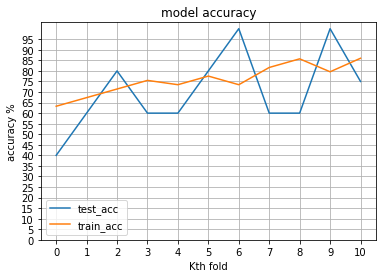

75.91%
70.45% (+/- 17.64%)


In [283]:
model = Sequential()
model.add(Dense(60, input_dim =12, activation='relu'))
model.add(Dropout(.42))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='tanh'))

# For a multi-class classification problem
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

es =tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', verbose=0, patience=15)

x = data.to_numpy()
y = labels

val_scores = []
scores = []
skf = StratifiedKFold(n_splits=11, shuffle=True,random_state = 1)

for train, test in skf.split(x,y):
    model.fit(x[train], y[train], batch_size = 5, epochs = 150, validation_data=(x[test], y[test]), verbose = 0, shuffle=True, callbacks=[es])
#     history = model.fit(x[train], y[train], batch_size = 25, epochs = 150, verbose = 0, shuffle=True, callbacks=[es])
    
    val_accuracy = model.evaluate(x[test], y[test])
    accuracy = model.evaluate(x[train], y[train])
    val_scores.append(val_accuracy[1] * 100)
    scores.append(accuracy[1] * 100)
#     print(history.history.keys())
#     print(history.history['val_accuracy'])
# Summarize history for accuracy
    
# plt.plot(history.history['accuracy'])
plt.plot(val_scores)
plt.plot(scores)
plt.title('model accuracy')
plt.yticks(np.arange(0,100,step=5))
plt.xticks(np.arange(0,len(val_scores),step=1))
plt.ylabel('accuracy %')
plt.xlabel('Kth fold')
plt.legend(['test_acc','train_acc'], loc = 'lower left')
plt.grid()
plt.show()

print("%.2f%%" % np.mean(scores))
print("%.2f%% (+/- %.2f%%)" % (np.mean(val_scores), np.std(val_scores)))